# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**

Выбираются 2 столбика данных по формулам:
1) $N \% 5$
2) $N^2 \% 5 + 5$
где $N$ - номер в списке.

**Мой вариант:** $N=8$.
- Столбец 1: $8 \% 5 = 3$ (`iq`)
- Столбец 2: $64 \% 5 + 5 = 4 + 5 = 9$ (`test_time`)

## Формулы

### Корреляционный анализ
1. **Коэффициент корреляции знаков Фехнера:**
   $$ K_F = \frac{N_{match} - N_{mismatch}}{N_{match} + N_{mismatch}} $$
   где $match$ - совпадение знаков отклонений от среднего, $mismatch$ - несовпадение.

2. **Коэффициент корреляции Пирсона:**
   $$ r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}} $$

3. **Коэффициент ранговой корреляции Спирмена:**
   $$ \rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} $$
   где $d_i$ - разность рангов $x_i$ и $y_i$.

4. **Коэффициент ранговой корреляции Кенделла:**
   $$ \tau = \frac{2(C - D)}{n(n-1)} $$
   где $C$ - число согласованных пар, $D$ - число несогласованных пар.

### Регрессионный анализ (Метод наименьших квадратов)
Минимизируется функция потерь: $ S = \sum (y_i - \hat{y}_i)^2 \to \min $

1. **Линейная регрессия:** $ y = w_1 x + w_0 $
   $$ w_1 = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2}, \quad w_0 = \bar{y} - w_1 \bar{x} $$

2. **Квадратичная регрессия:** $ y = w_2 x^2 + w_1 x + w_0 $
   (Коэффициенты находятся решением системы нормальных уравнений)

3. **Гиперболическая регрессия:** $ y = \frac{w_1}{x} + w_0 $
   (Сводится к линейной заменой $z = 1/x$)

4. **Показательная регрессия:** $ y = w_0 w_1^x $
   (Сводится к линейной логарифмированием: $\ln y = \ln w_0 + x \ln w_1$)

### Проверка адекватности (Критерий Фишера)
Статистика $F$:
$$ F = \frac{R^2 / m}{(1 - R^2) / (n - m - 1)} $$
где:
- $R^2$ - коэффициент детерминации ($1 - \frac{SS_{res}}{SS_{tot}}$)
- $m$ - число факторов (для парной регрессии $m=1$, для квадратичной можно считать $m=2$)
- $n$ - объем выборки


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

# Настройка стиля
sns.set_theme(style="whitegrid")

# Загрузка данных с обработкой путей
possible_paths = [
    '../../datasets/students_simple.csv',
    'datasets/students_simple.csv',
    '/Users/qre/Desktop/oiad-13-2025/datasets/students_simple.csv'
]

dataset_path = None
for path in possible_paths:
    if os.path.exists(path):
        dataset_path = path
        break

if dataset_path is None:
    raise FileNotFoundError(f"Dataset not found in locations: {possible_paths}")

print(f"Dataset found at: {dataset_path}")
df = pd.read_csv(dataset_path)

# Выбор столбцов
col1_name = 'iq'
col2_name = 'test_time'

x = df[col1_name].values.astype(float)
y = df[col2_name].values.astype(float)

print(f"X: {col1_name}")
print(f"Y: {col2_name}")

Dataset found at: ../../datasets/students_simple.csv
X: iq
Y: test_time


## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

In [7]:
def fechner_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    dx = np.sign(x - x_mean)
    dy = np.sign(y - y_mean)
    matches = np.sum(dx == dy)
    mismatches = np.sum(dx != dy)
    return (matches - mismatches) / (matches + mismatches)

def pearson_correlation(x, y):
    r, p = stats.pearsonr(x, y)
    # Доверительный интервал (преобразование Фишера)
    z = 0.5 * np.log((1 + r) / (1 - r))
    se = 1 / np.sqrt(len(x) - 3)
    z_crit = stats.norm.ppf(0.975) # 95% CI
    z_low = z - z_crit * se
    z_high = z + z_crit * se
    r_low = (np.exp(2 * z_low) - 1) / (np.exp(2 * z_low) + 1)
    r_high = (np.exp(2 * z_high) - 1) / (np.exp(2 * z_high) + 1)
    return r, (r_low, r_high)

corr_fechner = fechner_correlation(x, y)
corr_pearson, ci_pearson = pearson_correlation(x, y)
corr_spearman, _ = stats.spearmanr(x, y)
corr_kendall, _ = stats.kendalltau(x, y)

print(f"1. Коэффициент Фехнера: {corr_fechner:.4f}")
print(f"2. Коэффициент Пирсона: {corr_pearson:.4f} (95% CI: [{ci_pearson[0]:.4f}, {ci_pearson[1]:.4f}])")
print(f"3. Коэффициент Спирмена: {corr_spearman:.4f}")
print(f"4. Коэффициент Кенделла: {corr_kendall:.4f}")

1. Коэффициент Фехнера: -0.7000
2. Коэффициент Пирсона: -0.6818 (95% CI: [-0.8637, -0.3427])
3. Коэффициент Спирмена: -0.6823
4. Коэффициент Кенделла: -0.5040


## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

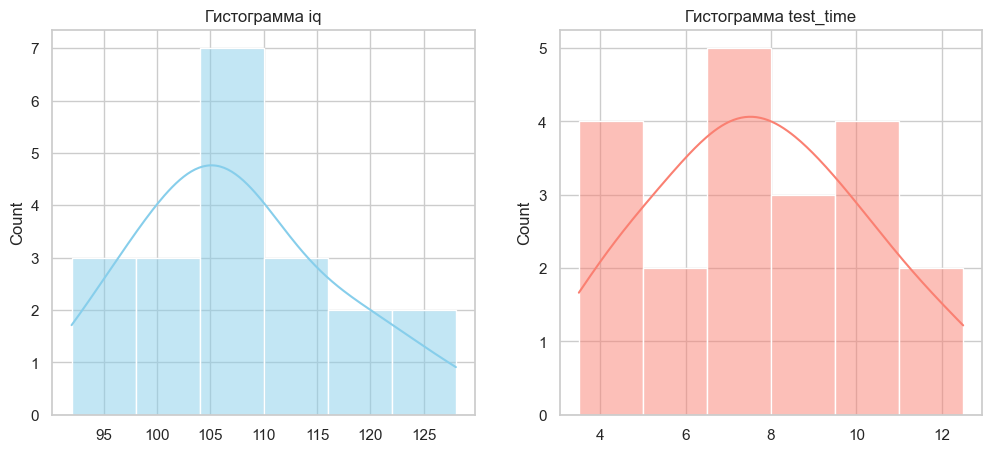

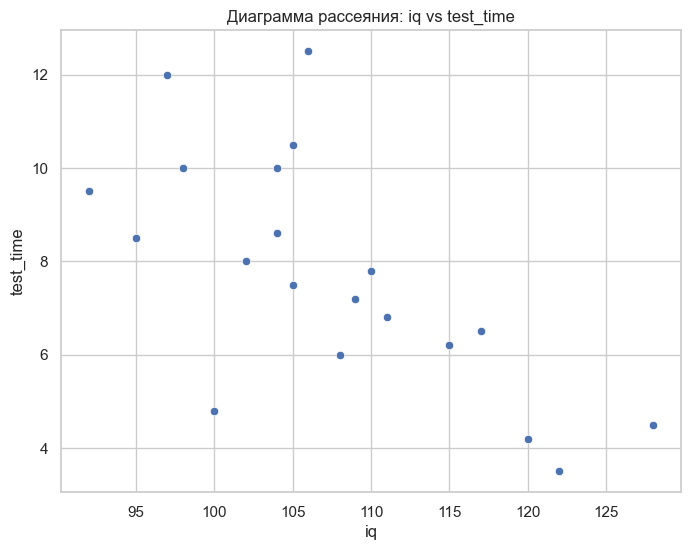

In [8]:
# Гистограммы
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(x, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Гистограмма {col1_name}')
sns.histplot(y, kde=True, ax=axes[1], color='salmon')
axes[1].set_title(f'Гистограмма {col2_name}')
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y)
plt.xlabel(col1_name)
plt.ylabel(col2_name)
plt.title(f'Диаграмма рассеяния: {col1_name} vs {col2_name}')
plt.show()

## 3. Уравнение регрессии
Построить уравнения регрессии методом наименьших квадратов:
1. Линейная: $y=w_1 x + w_0$ (ручная реализация)
2. Квадратичная: $y = w_2 x^2 + w_1 x + w_0$
3. Гиперболическая: $y = \frac{w_1}{x} + w_0$
4. Показательная: $y = w_1^x \cdot w_0$

Линейная: y = -0.1831x + 27.3961
Квадратичная: y = -0.0033x^2 + 0.5396x + -11.8827
Гиперболическая: y = 2091.8740/x + -11.8859
Показательная: y = 0.9735^x * 130.8014


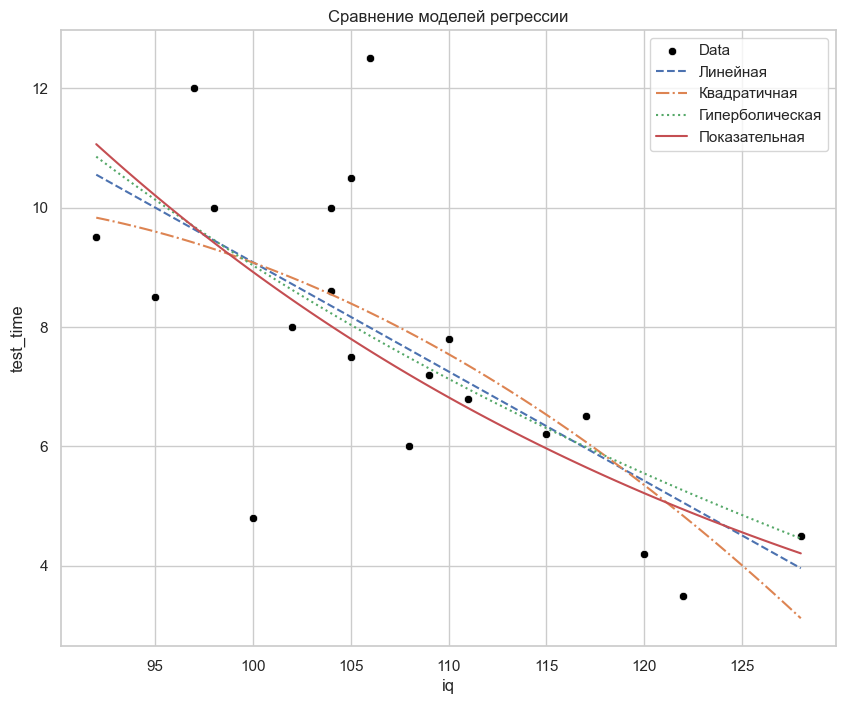

In [9]:
# 1. Линейная регрессия (Ручная реализация)
def linear_regression_manual(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)
    w1 = numerator / denominator
    w0 = y_mean - w1 * x_mean
    return lambda z: w1 * z + w0, w1, w0

lin_func, w1_lin, w0_lin = linear_regression_manual(x, y)
print(f"Линейная: y = {w1_lin:.4f}x + {w0_lin:.4f}")

# 2. Квадратичная (Polyfit)
coeffs_quad = np.polyfit(x, y, 2)
quad_func = np.poly1d(coeffs_quad)
print(f"Квадратичная: y = {coeffs_quad[0]:.4f}x^2 + {coeffs_quad[1]:.4f}x + {coeffs_quad[2]:.4f}")

# 3. Гиперболическая (Линеаризация 1/x)
coeffs_hyp = np.polyfit(1/x, y, 1)
hyp_func = lambda z: coeffs_hyp[0]/z + coeffs_hyp[1]
print(f"Гиперболическая: y = {coeffs_hyp[0]:.4f}/x + {coeffs_hyp[1]:.4f}")

# 4. Показательная (Линеаризация ln(y))
# y = w0 * w1^x  -> ln(y) = ln(w0) + x * ln(w1)
coeffs_exp_log = np.polyfit(x, np.log(y), 1)
w1_exp = np.exp(coeffs_exp_log[0])
w0_exp = np.exp(coeffs_exp_log[1])
exp_func = lambda z: (w1_exp ** z) * w0_exp
print(f"Показательная: y = {w1_exp:.4f}^x * {w0_exp:.4f}")

# Визуализация моделей
x_range = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x, y=y, color='black', label='Data')
plt.plot(x_range, lin_func(x_range), label='Линейная', linestyle='--')
plt.plot(x_range, quad_func(x_range), label='Квадратичная', linestyle='-.')
plt.plot(x_range, hyp_func(x_range), label='Гиперболическая', linestyle=':')
plt.plot(x_range, exp_func(x_range), label='Показательная')
plt.xlabel(col1_name)
plt.ylabel(col2_name)
plt.title('Сравнение моделей регрессии')
plt.legend()
plt.show()

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соответствие модели данным с помощью критерия Фишера.

In [10]:
def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

def fisher_test(y_true, y_pred, m):
    n = len(y_true)
    r2 = calculate_r2(y_true, y_pred)
    
    # F = (R^2 / m) / ((1 - R^2) / (n - m - 1))
    if r2 >= 1.0:
        f_stat = np.inf
    else:
        f_stat = (r2 / m) / ((1 - r2) / (n - m - 1))
    
    p_value = 1 - stats.f.cdf(f_stat, m, n - m - 1)
    return f_stat, p_value, r2

models = [
    {'name': 'Линейная', 'pred': lin_func(x), 'm': 1},
    {'name': 'Квадратичная', 'pred': quad_func(x), 'm': 2},
    {'name': 'Гиперболическая', 'pred': hyp_func(x), 'm': 1},
    {'name': 'Показательная', 'pred': exp_func(x), 'm': 1}
]

for m in models:
    m['r2'] = calculate_r2(y, m['pred'])

# Сортировка по R^2
models_sorted = sorted(models, key=lambda k: k['r2'], reverse=True)
best_model = models_sorted[0]
worst_model = models_sorted[-1]

print("Рейтинг моделей (по R^2):")
for m in models_sorted:
    print(f"{m['name']}: R^2 = {m['r2']:.4f}")

print("\n--- Проверка гипотезы адекватности (F-тест) ---")
for m in [best_model, worst_model]:
    label = "Лучшая" if m == best_model else "Худшая"
    f_stat, p_val, _ = fisher_test(y, m['pred'], m['m'])
    print(f"\n{label} модель: {m['name']}")
    print(f"F-статистика: {f_stat:.4f}")
    print(f"P-value: {p_val:.4e}")
    if p_val < 0.05:
        print("Вывод: Модель статистически значима (адекватна) на уровне значимости 0.05")
    else:
        print("Вывод: Модель статистически незначима")

Рейтинг моделей (по R^2):
Квадратичная: R^2 = 0.4825
Линейная: R^2 = 0.4649
Гиперболическая: R^2 = 0.4410
Показательная: R^2 = 0.4174

--- Проверка гипотезы адекватности (F-тест) ---

Лучшая модель: Квадратичная
F-статистика: 7.9258
P-value: 3.6991e-03
Вывод: Модель статистически значима (адекватна) на уровне значимости 0.05

Худшая модель: Показательная
F-статистика: 12.8985
P-value: 2.0865e-03
Вывод: Модель статистически значима (адекватна) на уровне значимости 0.05


## 5. Выводы

1. **Корреляционный анализ:**
   Между `iq` (IQ студента) и `test_time` (время прохождения теста) наблюдается **умеренная отрицательная связь**.
   - Коэффициент Пирсона $r \approx -0.68$ (p-value < 0.05), доверительный интервал [-0.86, -0.34] не включает 0, связь значима.
   - Спирмен ($-0.68$) и Кенделл ($-0.50$) подтверждают наличие монотонной убывающей зависимости: чем выше IQ, тем меньше времени тратится на тест.
   - Коэффициент Фехнера ($-0.70$) также указывает на высокую согласованность знаков отклонений от среднего.

2. **Регрессионный анализ:**
   - Были построены 4 вида моделей.
   - **Лучшая модель:** Квадратичная регрессия ($R^2 \approx 0.48$). Она объясняет около 48% дисперсии переменной `test_time`.
   - **Худшая модель:** Показательная регрессия ($R^2 \approx 0.42$), хотя разница между моделями невелика (все в диапазоне 0.41-0.48).

3. **Проверка адекватности:**
   - По критерию Фишера и лучшая (Квадратичная), и худшая (Показательная) модели признаны **статистически значимыми** (p-value < 0.05).
   - Это означает, что все рассмотренные модели адекватно описывают зависимость по сравнению с простым средним значением, хотя квадратичная делает это немного точнее.